<a href="https://colab.research.google.com/github/coumbacoulibaly/AdventureWorksCycles/blob/master/Revenue_Growth_and_Margin_Analysis_for_a_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Finance Portfolio/Revenue Growth and Margin Analysis/startup_revenue_analysis_2019_2023.csv')

df.head()

,Date,Product,Region,Revenue,COGS,Operating_Expenses,Marketing_Spend
0,2019-01-31,Product A,North Africa,66775.29,39726.14,15994.52,5422.71
1,2019-01-31,Product B,North Africa,18775.43,10331.72,4810.47,965.83
2,2019-01-31,Product C,East Africa,61929.92,24784.03,18506.63,5773.34
3,2019-01-31,Product D,East Africa,49109.17,23219.17,11873.51,2934.99
4,2019-02-28,Product A,Central Africa,78294.11,33091.13,19006.51,6010.82


In [6]:
#Cleaning the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                240 non-null    object 
 1   Product             240 non-null    object 
 2   Region              240 non-null    object 
 3   Revenue             240 non-null    float64
 4   COGS                240 non-null    float64
 5   Operating_Expenses  240 non-null    float64
 6   Marketing_Spend     240 non-null    float64
dtypes: float64(4), object(3)
memory usage: 13.3+ KB


In [9]:
#Converting date
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                240 non-null    datetime64[ns]
 1   Product             240 non-null    object        
 2   Region              240 non-null    object        
 3   Revenue             240 non-null    float64       
 4   COGS                240 non-null    float64       
 5   Operating_Expenses  240 non-null    float64       
 6   Marketing_Spend     240 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.3+ KB


In [13]:
#Converting Product and Region to string
df['Product'] = df['Product'].astype(str)
df['Region'] = df['Region'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                240 non-null    datetime64[ns]
 1   Product             240 non-null    object        
 2   Region              240 non-null    object        
 3   Revenue             240 non-null    float64       
 4   COGS                240 non-null    float64       
 5   Operating_Expenses  240 non-null    float64       
 6   Marketing_Spend     240 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 13.3+ KB


In [22]:
#Creating calculated columns
#Gross Margin
df['Gross Margin'] = df['Revenue'] - df['COGS']

#Operating Income
df['Operating Income'] = df['Gross Margin'] - df['Operating_Expenses']

#Operating Margin
df['Operating Margin'] = (df['Operating Income'] / df['Revenue'])*100

#Net Profit or Net Income
df['Net Profit'] = df['Revenue'] - df['Operating_Expenses'] - df['COGS'] - df['Marketing_Spend']

#Net Profit Margin
df['Net Profit Margin'] = (df['Net Profit'] / df['Revenue'])*100

df.head()

,Date,Product,Region,Revenue,COGS,Operating_Expenses,Marketing_Spend,Gross Margin,Operating Income,Operating Margin,Net Profit,Net Profit Margin,%Operating Margin,%Net Profit Margin
0,2019-01-31,Product A,North Africa,66775.29,39726.14,15994.52,5422.71,27049.15,11054.63,16.554971,5631.92,8.434138,16.554971,8.434138
1,2019-01-31,Product B,North Africa,18775.43,10331.72,4810.47,965.83,8443.71,3633.24,19.351035,2667.41,14.206918,19.351035,14.206918
2,2019-01-31,Product C,East Africa,61929.92,24784.03,18506.63,5773.34,37145.89,18639.26,30.097342,12865.92,20.774966,30.097342,20.774966
3,2019-01-31,Product D,East Africa,49109.17,23219.17,11873.51,2934.99,25890.00,14016.49,28.541492,11081.50,22.565032,28.541492,22.565032
4,2019-02-28,Product A,Central Africa,78294.11,33091.13,19006.51,6010.82,45202.98,26196.47,33.459056,20185.65,25.781824,33.459056,25.781824


<Axes: xlabel='Date'>

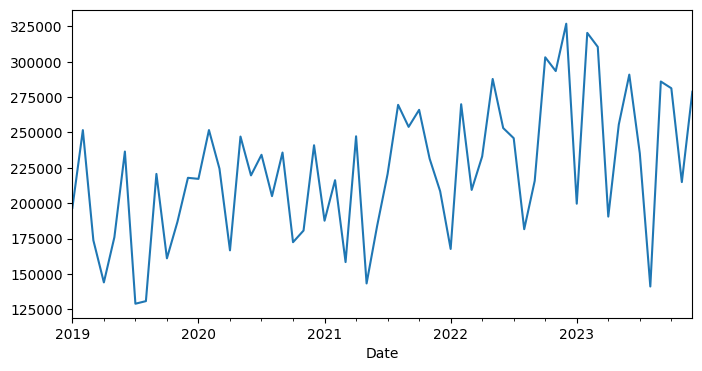

In [49]:
#Financial Overview
#Total Revenue per months
import matplotlib.pyplot as plt

total_revenue = df.groupby('Date')['Revenue'].sum()
total_revenue.plot(kind='line', figsize=(8,4))


<Axes: xlabel='Year'>

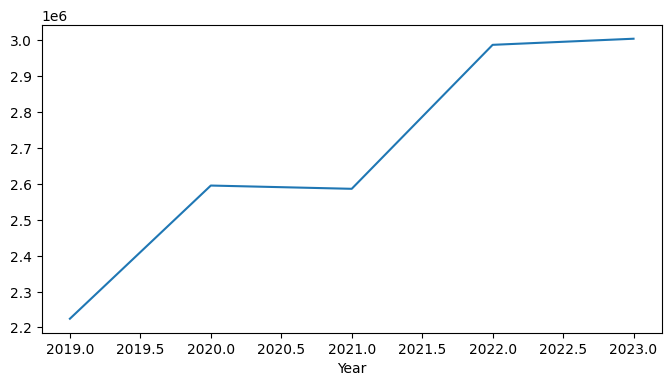

In [48]:
#Total revenue per year
df['Year'] = df['Date'].dt.year
total_revenue_per_year = df.groupby('Year')['Revenue'].sum()
total_revenue_per_year.plot(kind='line', figsize=(8,4))

<Axes: xlabel='Year'>

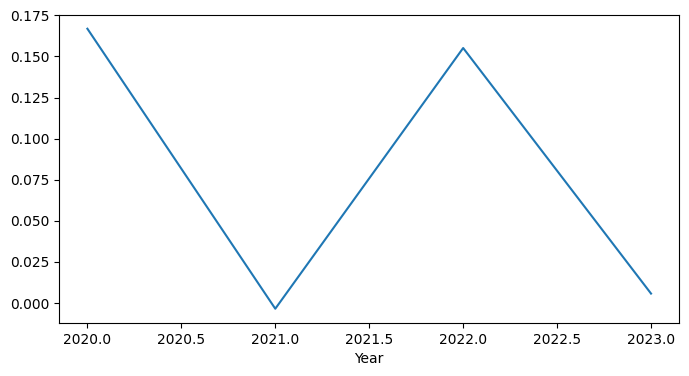

In [47]:
#YoY growth percentage
revenue_growth = total_revenue.pct_change()
revenue_growth.plot(kind='line', figsize=(8,4))

<Axes: xlabel='Year'>

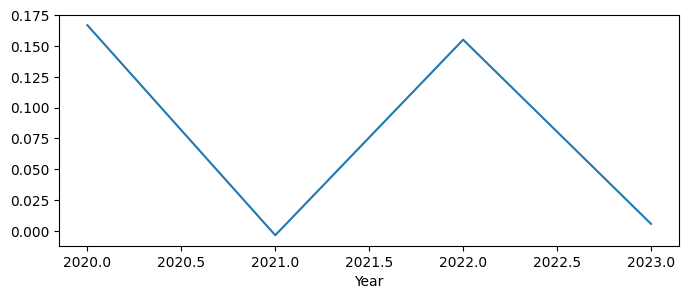

In [46]:
#YoY growth percentage
revenue_growth_per_year = total_revenue_per_year.pct_change()
revenue_growth_per_year.plot(kind='line', figsize=(8,3))

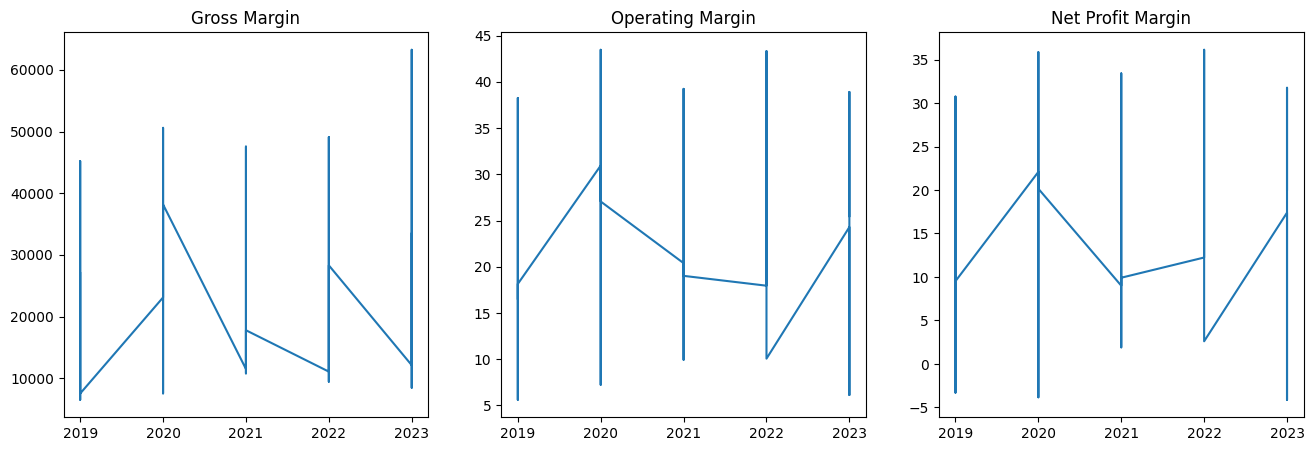

In [52]:
#Gross Margin %, Operating Margin %, Net Margin % Plots
figs, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

axes[0].plot(df['Year'], df['Gross Margin'])
axes[0].set_title('Gross Margin')

axes[1].plot(df['Year'], df['Operating Margin'])
axes[1].set_title('Operating Margin')

axes[2].plot(df['Year'], df['Net Profit Margin'])
axes[2].set_title('Net Profit Margin')


plt.show()


<Axes: xlabel='Year'>

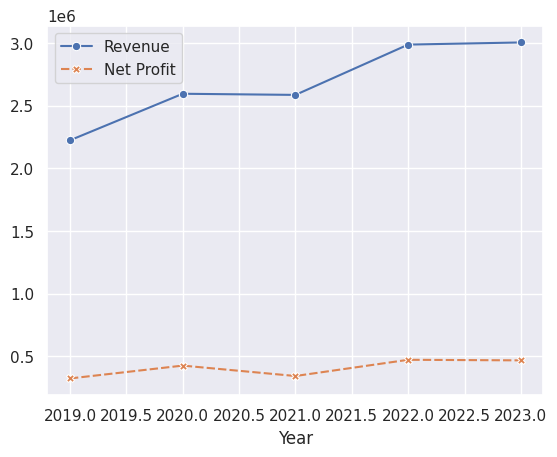

In [62]:
#Performance Analysis
import seaborn as sns

#Revenue vs Profit Trends
Trend = df.groupby('Year')[['Revenue','Net Profit']].sum()

sns.set_theme(style = 'darkgrid')
sns.lineplot(data=Trend, markers=True)
#Trend.head()

In [68]:
#Product Contribution
#Revenue per product
Revenue_per_product = df.groupby('Product')['Revenue'].sum()
Revenue_per_product

,Revenue
Product,
Product A,3076524.30
Product B,3546711.37
Product C,3523054.32
Product D,3252592.71


In [69]:
#Profit by product
#Gross profit
Gross_profit = df.groupby('Product')['Gross Margin'].sum()
Gross_profit


,Gross Margin
Product,
Product A,1377057.15
Product B,1660980.52
Product C,1617609.49
Product D,1555266.11


In [70]:
#Net Profit
Net_profit = df.groupby('Product')['Net Profit'].sum()
Net_profit

,Net Profit
Product,
Product A,431969.33
Product B,568201.07
Product C,448997.37
Product D,589279.10


In [72]:
#Product contribution%
total_revenue = df['Revenue'].sum()
product_contribution = (Revenue_per_product / total_revenue)*100

product_contribution.sort_values(ascending=False)

,Revenue
Product,
Product B,26.470202
Product C,26.293643
Product D,24.275104
Product A,22.961051


In [74]:
#Regional Breakdown
#Revenue by region
Revenue_by_region = df.groupby('Region')['Revenue'].sum()
Revenue_by_region

,Revenue
Region,
Central Africa,3090716.72
East Africa,3110091.69
North Africa,3587133.20
West Africa,3610941.09


In [75]:
#Gross Profit
Gross_profit_by_region = df.groupby('Region')['Gross Margin'].sum()
Gross_profit_by_region

,Gross Margin
Region,
Central Africa,1425470.91
East Africa,1474469.79
North Africa,1628939.37
West Africa,1682033.20


In [76]:
#Net Profit
Net_profit_by_region = df.groupby('Region')['Net Profit'].sum()
Net_profit_by_region


,Net Profit
Region,
Central Africa,464384.40
East Africa,504367.83
North Africa,531508.04
West Africa,538186.60


In [78]:
#Region Contribution %
region_contribution = (Revenue_by_region / total_revenue)*100
region_contribution.sort_values(ascending=False)

,Revenue
Region,
West Africa,26.949569
North Africa,26.771883
East Africa,23.211575
Central Africa,23.066973


In [80]:
#Cost Efficiency Ratios
#COGS%
df['COGS%'] = (df['COGS'] / df['Revenue'])*100

#Opex%
df['Opex%'] = (df['Operating_Expenses'] / df['Revenue'])*100

#Marketing%
df['Marketing%'] = (df['Marketing_Spend'] / df['Revenue'])*100

df[['COGS%','Opex%','Marketing%']]

,COGS%,Opex%,Marketing%
0,59.492276,23.952753,8.120833
1,55.027874,25.621091,5.144117
2,40.019477,29.883181,9.322376
3,47.280722,24.177786,5.976460
4,42.265159,24.275785,7.677231
...,...,...,...
235,45.003749,17.512233,5.731978
236,54.869424,24.249055,9.290613
237,57.852179,27.025918,7.376148
238,53.825036,23.962133,10.486831


<Axes: >

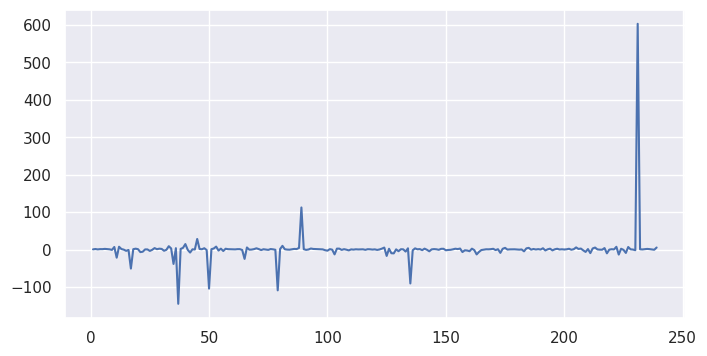

In [84]:
#EBIT
df['EBIT'] = df['Revenue'] - df['COGS'] - df['Operating_Expenses'] - df['Marketing_Spend']
EBIT_growth = df['EBIT'].pct_change()
Revenue_growth = df['Revenue'].pct_change()
Operating_leverage = EBIT_growth/Revenue_growth

Operating_leverage.plot(kind='line', figsize=(8,4))
#

In [86]:
#Strategic Insights
#ROI
df['ROI'] = (df['Net Profit'] / df['Marketing_Spend'])*100
df['ROI']

,ROI
0,103.858034
1,276.178002
2,222.850551
3,377.565171
4,335.821901
...,...
235,553.945594
236,124.759353
237,105.010857
238,111.816431


In [90]:
#Return on Ad Spend (ROAS)
df['ROAS'] = (df['Revenue'] / df['Marketing_Spend'])*100
df['ROAS']

,ROAS
0,1231.400720
1,1943.968400
2,1072.687907
3,1673.231255
4,1302.552896
...,...
235,1744.598419
236,1076.355283
237,1355.721258
238,953.576897
